🎬 Figuring out the Algorithm: A Recommendation Audit on Netflix
An exploratory data analysis of my Netflix viewing history to examine:
- What content I actually watch
- How genres and preferences evolve over time
- Whether platform recommendations align with real preferences

## Data Cleaning
First we go ahead and import the correct file so it can be used properly. Ensure is it formatted and imported properly.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data/netflix_cleaned.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")


C:\Users\joelj\AppData\Local\Temp\ipykernel_23132\4137074651.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")


# 1. Top Genres in My Viewing History
A breakdown of the most frequently watched genres in my Netflix history. This helps highlight my core content preferences and recurring themes in what I enjoy watching.

C:\Users\joelj\AppData\Local\Temp\ipykernel_23132\27882723.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


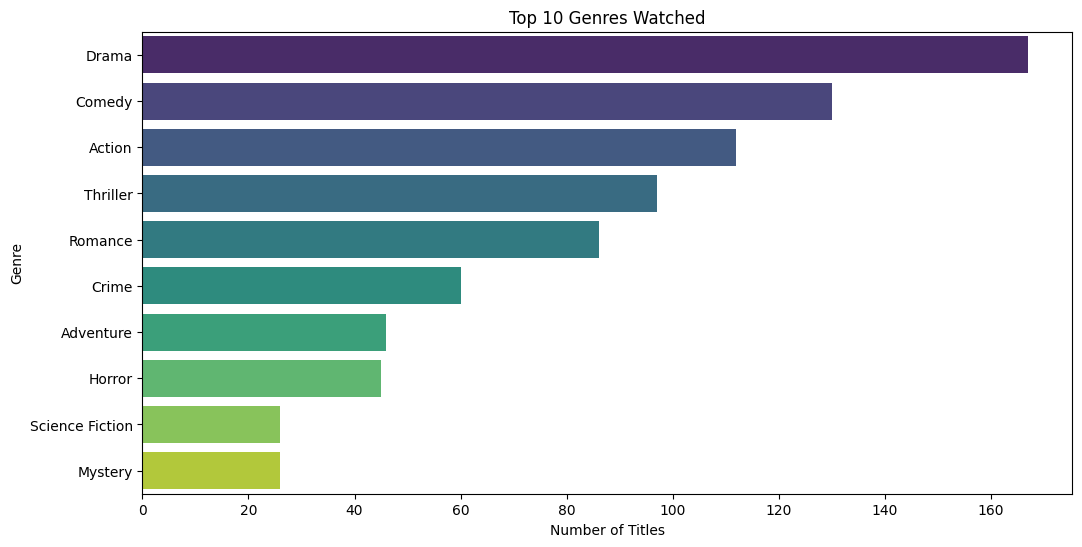

In [24]:
df_genres = df.copy()
df_genres["Genre"] = df_genres["Genre"].fillna("")
df_genres = df_genres.assign(Genre=df_genres["Genre"].str.split(", "))
df_genres = df_genres.explode("Genre")

top_genres = df_genres["Genre"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres Watched")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

The most-watched genre in my viewing history is Drama, which tells me I have a strong preference for emotionally rich, character-driven stories. I’m drawn to dramas because they explore complex human experiences, relationships, and moral dilemmas. I enjoy content that offers depth and nuance, where I can connect with the characters on a personal level. These stories often make me reflect and feel emotionally invested. After Drama, I watch a lot of Comedy and Action. This shows I like a good balance ad I appreciate serious, thought-provoking narratives, but I also enjoy lighter, more entertaining content. Comedy brings humor and helps me unwind with something fun and lighthearted. Action adds excitement and energy with fast-paced plots and thrilling sequences. Together, these genres give me a mix of emotions, from laughter to adrenaline, which complements the deeper tone I get from dramas.

# 2. Preferred Movie Length: How Long Do I Like My Content?
Analyses the runtime of the titles I’ve watched to understand whether I lean toward long or short feature-length films.

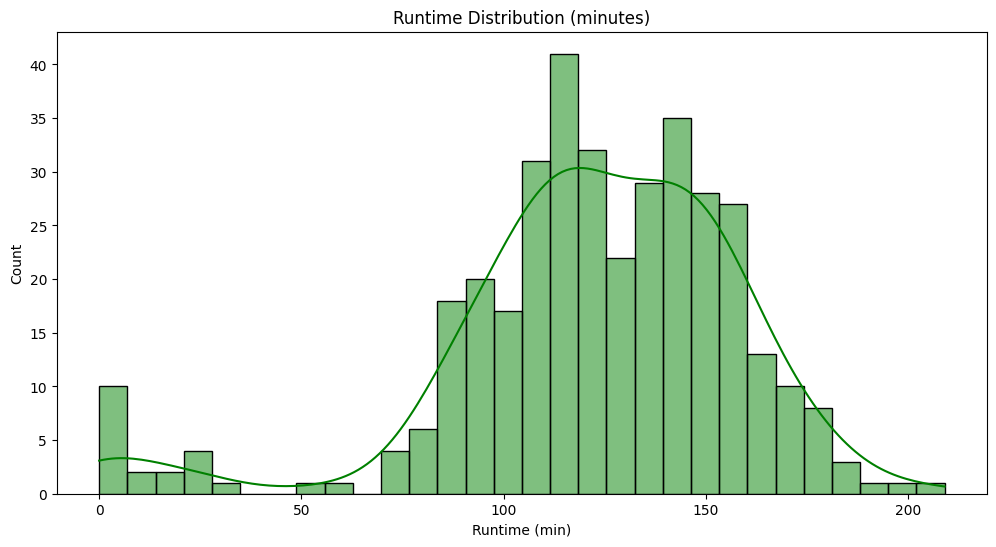

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df["Runtime"].dropna(), bins=30, kde=True, color="green")
plt.title("Runtime Distribution (minutes)")
plt.xlabel("Runtime (min)")
plt.show()

Most of the content I consume falls within the 100–160 minute range, indicating a preference for standard-length feature films. Very short or very long content is much less frequent in my watch history. The data peaks at 115 minutes and 140 minutes indicates my ideal watch times during that time period.

# 3. Where My Content Comes From: Top 10 Countries
Shows the distribution of countries producing the content I watch most. This reveals whether I mostly consume content from Hollywood or have more globally diverse tastes.

C:\Users\joelj\AppData\Local\Temp\ipykernel_23132\2329085441.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Set2")


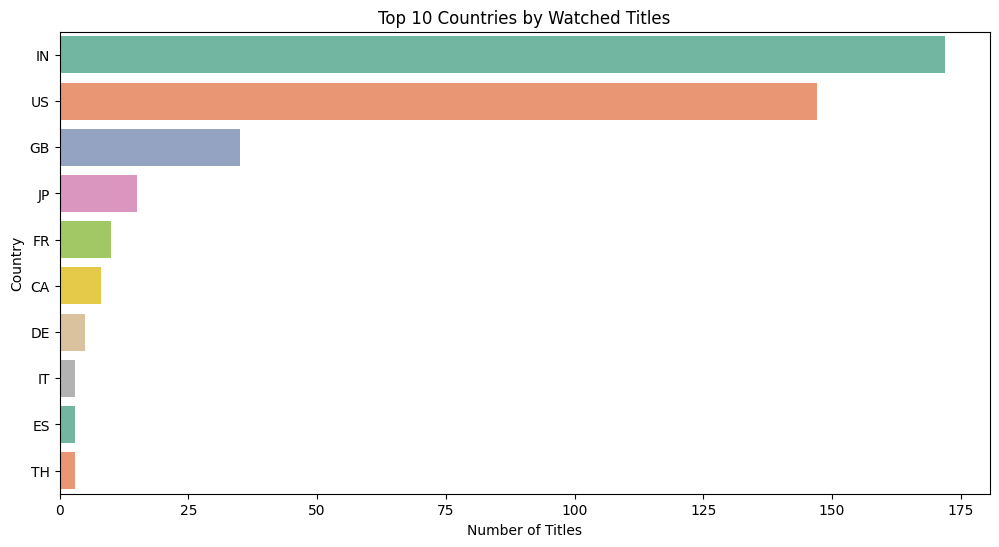

In [26]:
df_countries = df.copy()
df_countries = df_countries.assign(Country=df_countries["Country"].str.split(", "))
df_countries = df_countries.explode("Country")

top_countries = df_countries["Country"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Set2")
plt.title("Top 10 Countries by Watched Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

The majority of the titles I watch are produced in India, with the Umited States, United Kingdom, and Japan also featuring prominently. This shows that while my watch history is Bollywood centric, due to me coming from there, there"s moderate global diversity. There is also a massive connection between the Bolloywood and Drama genre that has allowed me to invest more time and energy into it.

# 4. My Top 5 Genres Over Time: How Have My Tastes Evolved?
Tracks how my interest in certain genres has shifted year by year. This gives insight into how my mood, interests, or platform trends may have influenced my watching behavior.

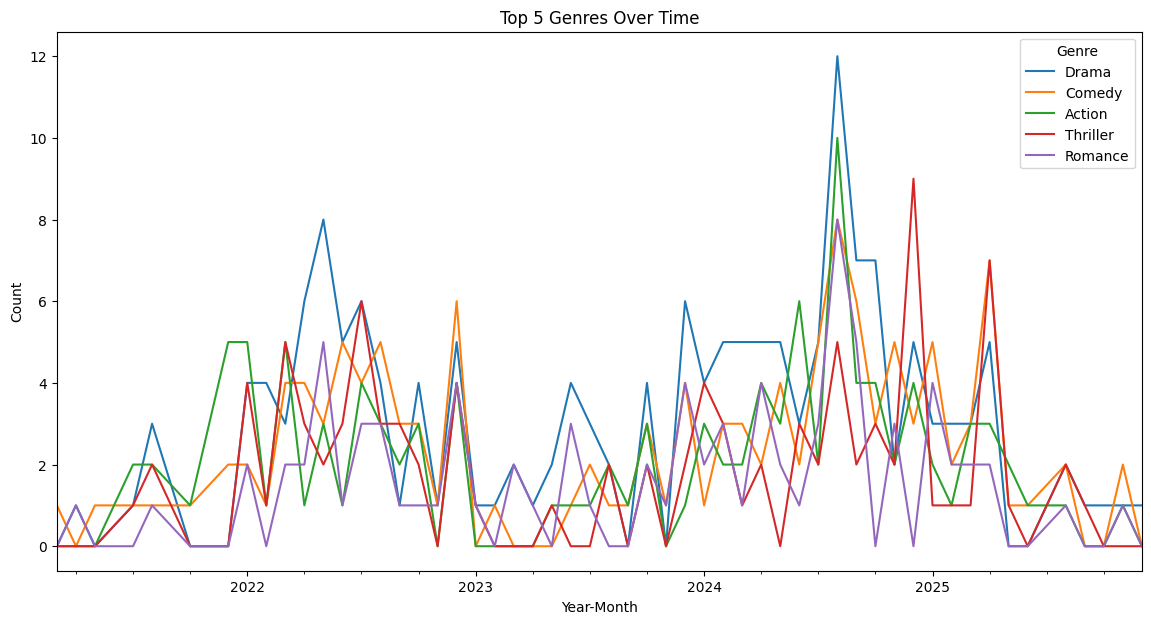

In [27]:
df_genres = df.assign(Genre=df["Genre"].str.split(", ")).explode("Genre")

df_genres["YearMonth"] = df_genres["Date"].dt.to_period("M")

genre_monthly = df_genres.groupby(["YearMonth", "Genre"]).size().unstack(fill_value=0)

top_5_genres = genre_monthly.sum().sort_values(ascending=False).head(5).index
genre_monthly[top_5_genres].plot(figsize=(14,7))
plt.title("Top 5 Genres Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()

This graph illustrates several interesting trends. One notable pattern is my interest in Drama, which peaks at various points, particularly in early 2022 and mid-July 2024. Another surprising insight is the surge in Thriller viewership. Although Thriller ranks as my fourth favorite genre, it has experienced occasional spikes, especially recently. Additionally, the graph highlights my Netflix usage, showing a noticeable decline in movies watched during 2023, possibly reflecting a temporary loss of interest in movies during that period.

# 5. Release Year Distribution: Do I Watch More Modern or Classic Titles?
Looks at the release years of titles I"ve watched to see whether I gravitate toward newly released content or enjoy revisiting older films and series.

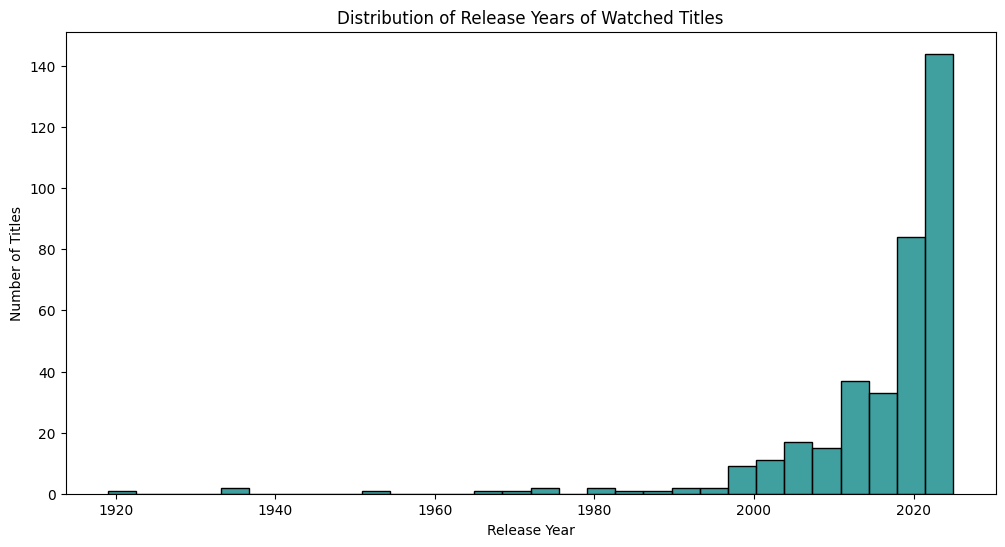

In [28]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df["Release_Year"].dropna(), bins=30, kde=False, color="teal")
plt.title("Distribution of Release Years of Watched Titles")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

The bulk of the content I’ve watched was released after 2020, showing a strong preference for recent titles. There"s a visible drop-off in titles from before 2015, suggesting I rarely explore older or classic media.

## Recommendation Audit

According to Netflix, my top 10 recommended next movies to watch are listed below. Some titles I"ve already seen are noted accordingly:

| Movie Title                              | Genre            | Runtime | Region | Release Date | Status          |
| ---------------------------------------- | ---------------- | ------- | ------ | ------------ | --------------- |
| The Diplomat (2025)                      | Drama/Thriller   | 2h 17m  | India  | 2025         | To Watch        |
| Mission: Impossible – Dead Reckoning     | Action/Adventure | 2h 49m  | USA    | 2023         | To Watch        |
| Jack (2025)                              | Action/Comedy    | 2h 13m  | India  | 2025         | To Watch        |
| Good Bad Ugly (2025)                     | Action/Comedy    | 2h 18m  | India  | 2025         | Already Watched |
| Mad                                      | Comedy/Drama     | 2h 7m   | India  | 2023         | Already Watched |
| Now You See Me                           | Thriller/Crime   | 1h 55m  | USA    | 2013         | Already Watched |
| PK                                       | Comedy/Drama     | 2h 33m  | India  | 2014         | To Watch        |
| Final Destination                        | Horror/Thriller  | 1h 38m  | USA    | 2000         | To Watch        |
| Bad Influence                            | Thriller/Drama   | 1h 40m  | USA    | 1990         | To Watch        |
| Happy New Year                           | Comedy/Drama     | 2h 43m  | India  | 2014         | Already Watched |

As per Netflix recommendation the stats are as follows:

| Genre    | Count |
| -------- | ----- |
| Drama    | 6     |
| Comedy   | 5     |
| Thriller | 4     |
| Action   | 4     |
| Crime    | 1     |
| Horror   | 1     |

Based on the recommendations Netflix has provided, there is a clear alignment with the viewing patterns observed in my past watch history. Drama emerges as the most frequently suggested genre, which directly reflects my consistent interest in dramatic storytelling. Additionally, Comedy, Action, and Thriller genres also feature prominently among the recommendations, further reinforcing the match between my historical preferences and Netflix’s algorithm. This consistency suggests that Netflix"s recommendation system has accurately identified my genre tendencies and is tailoring suggestions accordingly.

| Country | Count |
| ------- | ----- |
| India   | 6     |
| USA     | 4     |

As shown in the data, India once again dominates my recommendation list, with 60% of the suggested titles originating from Indian cinema. This strongly correlates with my personal viewing history, where Indian films consistently top the charts. The prominence of Indian content in both my past watches and Netflix"s recommendations suggests a strong regional preference that the platform has accurately recognized and incorporated into its algorithm.

| Time Range      | Number of Movies |
| --------------- | ---------------- |
|   Before 2010   | 2                |
|   2010 – 2020   | 3                |
|   After 2020    | 5                |


According to my data, the bulk of the content I’ve watched and been recommended was released after 2020, with 5 out of 10 titles (50%) falling into this category. This indicates a strong preference for newer releases and suggests that my viewing habits are closely aligned with recent trends and contemporary content. In contrast, only 3 out of 10 titles (30%) were released between 2010 and 2020, and just 2 out of 10 titles (20%) date back to before 2010. This sharp drop-off in older content highlights that I rarely engage with classic or pre-2010 media, and that Netflix’s recommendation algorithm has likely deprioritized those titles in favor of more modern options. This distribution reinforces the idea that timeliness and recency play a significant role in my entertainment choices, and Netflix seems to reflect that accurately in its suggestions.



## Key Takeaways

My top genres are Drama, Comedy, and Action. These genres consistently appear both in my watch history and Netflix’s recommendations, highlighting my preference for emotionally engaging stories, humor, and exciting, fast-paced content. I tend to watch more recent releases rather than older titles. The majority of the movies I watch and those recommended to me were released after 2020, showing a clear preference for fresh, contemporary content over classic or older films. Netflix recommendations align moderately with my preferences. While the platform effectively suggests movies within my favorite genres and recent releases, there is still room for improvement in fine-tuning suggestions to better capture my full range of interests.
